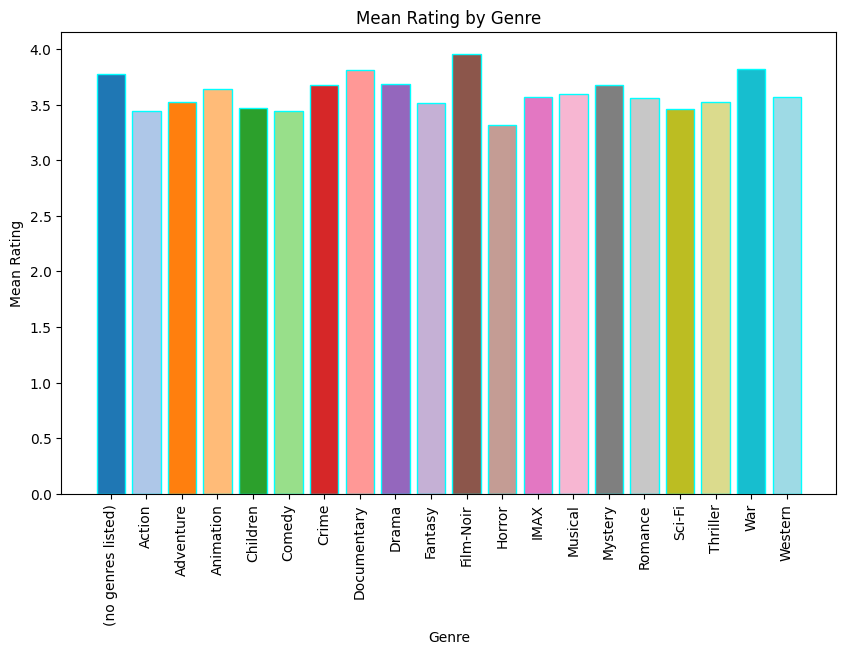

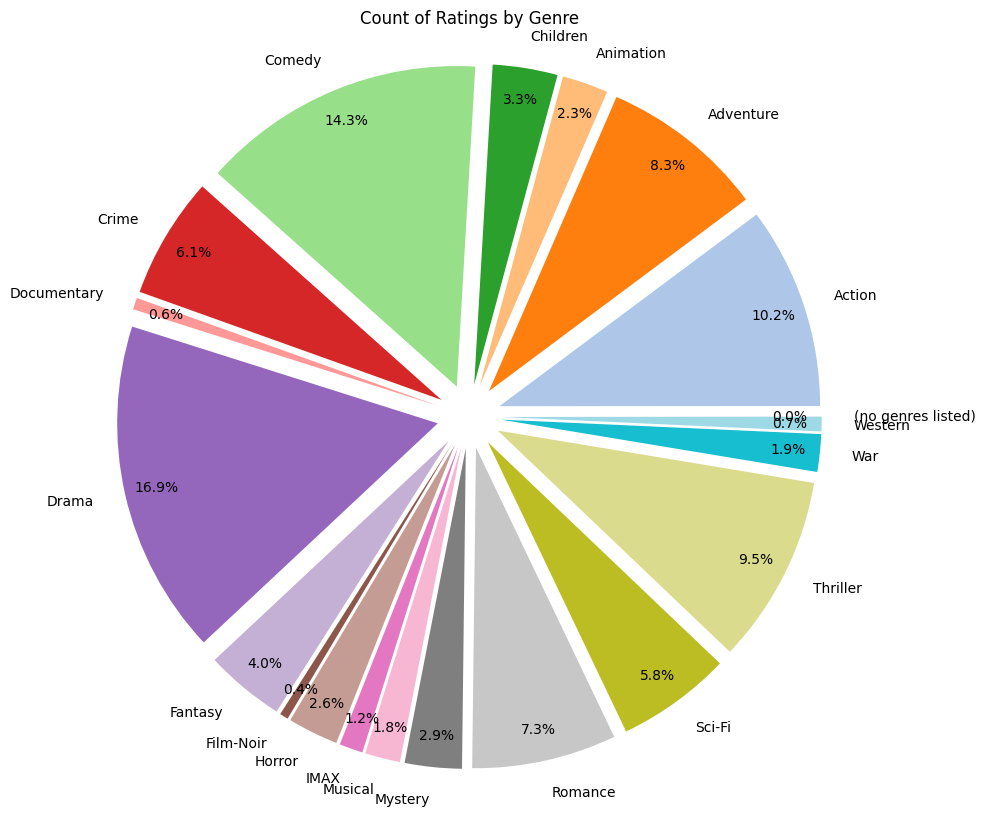

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read the csv files
movies = pd.read_csv("./Data/movies.csv")
ratings = pd.read_csv("./Data/ratings.csv")

#Stack genres columns into one column and join with the movies dataframe
genres = movies["genres"].str.split("|", expand=True)
genres = genres.stack().reset_index(level=1, drop=True).to_frame("genre")
movies = movies.drop("genres", axis=1).join(genres)

#Merge movies and ratings and calculate mean rating and count of ratings
data = pd.merge(movies, ratings, on="movieId")
stats = data.groupby("genre").agg({"rating": ["mean", "count"]})

#Configure charts colors
cmap = plt.cm.tab20
colors = cmap(np.arange(20))

#Bar chart for mean rating / genre
plt.figure(figsize=(10, 6))
plt.bar(stats.index, stats["rating"]["mean"], color=colors, edgecolor="cyan")
plt.xlabel("Genre")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Genre")
plt.xticks(rotation=90)
plt.show()

#Pie chart for count of ratings by genre
plt.figure(figsize=(10, 10))
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(stats["rating"]["count"], labels=stats.index, autopct="%1.1f%%", pctdistance=0.9, 
        colors=colors, shadow=False, explode=explode)
plt.axis('equal')
plt.title("Count of Ratings by Genre")
plt.show()